In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data_masks = pd.read_csv('/content/mask-use-by-county.csv')
data_masks.sample(n=5)

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
1697,31087,0.085,0.162,0.190,0.263,0.301
1654,31001,0.057,0.128,0.089,0.291,0.435
1335,27043,0.078,0.158,0.163,0.261,0.340
103,4013,0.023,0.025,0.059,0.158,0.734
525,13281,0.076,0.096,0.098,0.199,0.531


In [ ]:
data_counties = pd.read_csv("/content/us-counties.csv")
data_counties.sample(n = 5)

,date,county,state,fips,cases,deaths
1747149,2021-09-23,Cavalier,North Dakota,38019.0,495,5.0
943155,2021-01-19,Barbour,Alabama,1005.0,1738,36.0
74328,2020-04-20,Polk,Missouri,29167.0,1,0.0
1639344,2021-08-21,Wright,Minnesota,27171.0,17067,156.0
2084346,2022-01-05,Barnstable,Massachusetts,25001.0,26145,565.0


In [ ]:
county_deaths = data_counties.groupby(['county', 'state','fips'])['deaths'].sum().reset_index()
county_deaths

,county,state,fips,deaths
0,Abbeville,South Carolina,45001.0,26081.0
1,Acadia,Louisiana,22001.0,132996.0
2,Accomack,Virginia,51001.0,36094.0
3,Ada,Idaho,16001.0,360167.0
4,Adair,Iowa,19001.0,18771.0
...,...,...,...,...
3215,Yuma,Arizona,4027.0,515681.0
3216,Yuma,Colorado,8125.0,9567.0
3217,Zapata,Texas,48505.0,20732.0
3218,Zavala,Texas,48507.0,27227.0


In [ ]:
county_cases = data_counties.groupby(['county', 'state','fips'])['cases'].sum().reset_index()
county_cases

,county,state,fips,cases
0,Abbeville,South Carolina,45001.0,1990471
1,Acadia,Louisiana,22001.0,5484277
2,Accomack,Virginia,51001.0,2306179
3,Ada,Idaho,16001.0,40965355
4,Adair,Iowa,19001.0,573173
...,...,...,...,...
3215,Yuma,Arizona,4027.0,24611767
3216,Yuma,Colorado,8125.0,632320
3217,Zapata,Texas,48505.0,1199444
3218,Zavala,Texas,48507.0,1331119


In [ ]:
county_deaths['COUNTYFP'] = county_deaths['fips'].astype(int)
county_deaths = county_deaths.drop(['state','fips'],axis = 1)
merged_df = pd.merge(county_deaths, data_masks, on='COUNTYFP', how='inner')
merged_df

,county,deaths,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,Abbeville,26081.0,45001,0.117,0.102,0.243,0.166,0.371
1,Acadia,132996.0,22001,0.122,0.111,0.138,0.265,0.362
2,Accomack,36094.0,51001,0.001,0.019,0.055,0.100,0.824
3,Ada,360167.0,16001,0.118,0.078,0.084,0.194,0.526
4,Adair,18771.0,19001,0.073,0.128,0.128,0.307,0.364
...,...,...,...,...,...,...,...,...
3128,Yuma,515681.0,4027,0.008,0.013,0.046,0.129,0.804
3129,Yuma,9567.0,8125,0.038,0.284,0.133,0.255,0.290
3130,Zapata,20732.0,48505,0.047,0.001,0.035,0.138,0.779
3131,Zavala,27227.0,48507,0.036,0.075,0.115,0.138,0.635


In [ ]:
mask_columns = ['NEVER', 'RARELY', 'SOMETIMES', 'FREQUENTLY', 'ALWAYS']
correlations = merged_df[['deaths'] + mask_columns].corr()

# Extract correlation of 'deaths' with mask-wearing scores
correlation_with_deaths = correlations.loc['deaths', mask_columns]
print(correlation_with_deaths)

NEVER        -0.168114
RARELY       -0.186858
SOMETIMES    -0.178564
FREQUENTLY   -0.141925
ALWAYS        0.260048
Name: deaths, dtype: float64


Text(0.5, 1.0, 'Correlation Between Deaths and Mask-Wearing Scores')

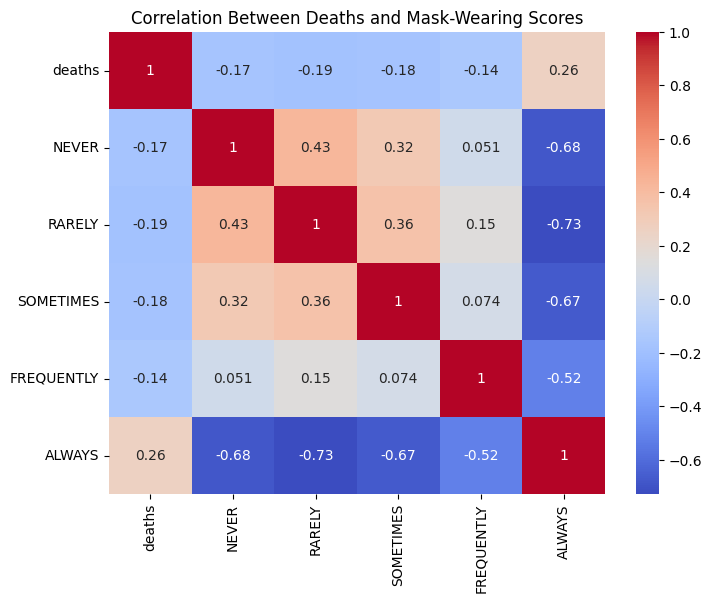

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title("Correlation Between Deaths and Mask-Wearing Scores")

In [ ]:
county_cases['COUNTYFP'] = county_cases['COUNTYFP'].astype(int)
merged_df_2 = pd.merge(county_cases, data_masks, on='COUNTYFP', how='inner')
merged_df_2

,county,cases,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,Abbeville,1990471,45001,0.117,0.102,0.243,0.166,0.371
1,Acadia,5484277,22001,0.122,0.111,0.138,0.265,0.362
2,Accomack,2306179,51001,0.001,0.019,0.055,0.100,0.824
3,Ada,40965355,16001,0.118,0.078,0.084,0.194,0.526
4,Adair,573173,19001,0.073,0.128,0.128,0.307,0.364
...,...,...,...,...,...,...,...,...
3128,Yuma,24611767,4027,0.008,0.013,0.046,0.129,0.804
3129,Yuma,632320,8125,0.038,0.284,0.133,0.255,0.290
3130,Zapata,1199444,48505,0.047,0.001,0.035,0.138,0.779
3131,Zavala,1331119,48507,0.036,0.075,0.115,0.138,0.635


Text(0.5, 1.0, 'Correlation Between Cases and Mask-Wearing Scores')

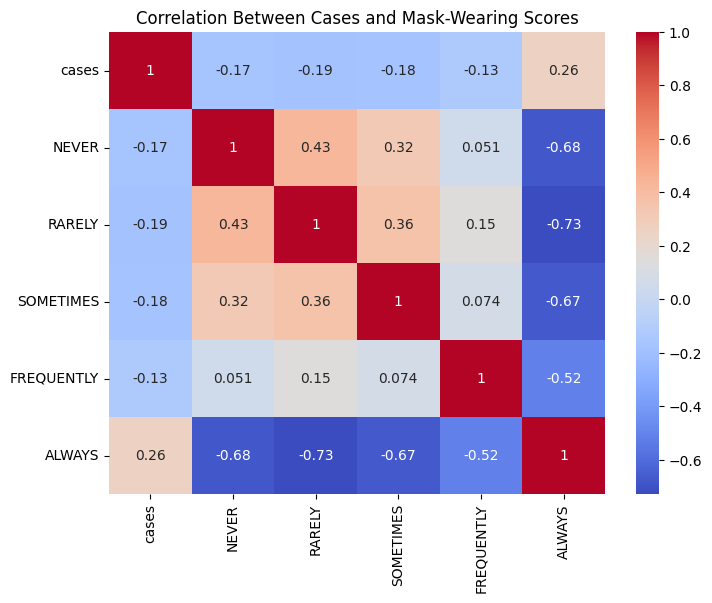

In [ ]:
mask_columns = ['NEVER', 'RARELY', 'SOMETIMES', 'FREQUENTLY', 'ALWAYS']
correlations_2 = merged_df_2[['cases'] + mask_columns].corr()

# Extract correlation of 'deaths' with mask-wearing scores
correlation_with_cases = correlations.loc['cases', mask_columns]
#print(correlation_with_cases)
plt.figure(figsize=(8, 6))
sns.heatmap(correlations_2, annot=True, cmap='coolwarm')
plt.title("Correlation Between Cases and Mask-Wearing Scores")

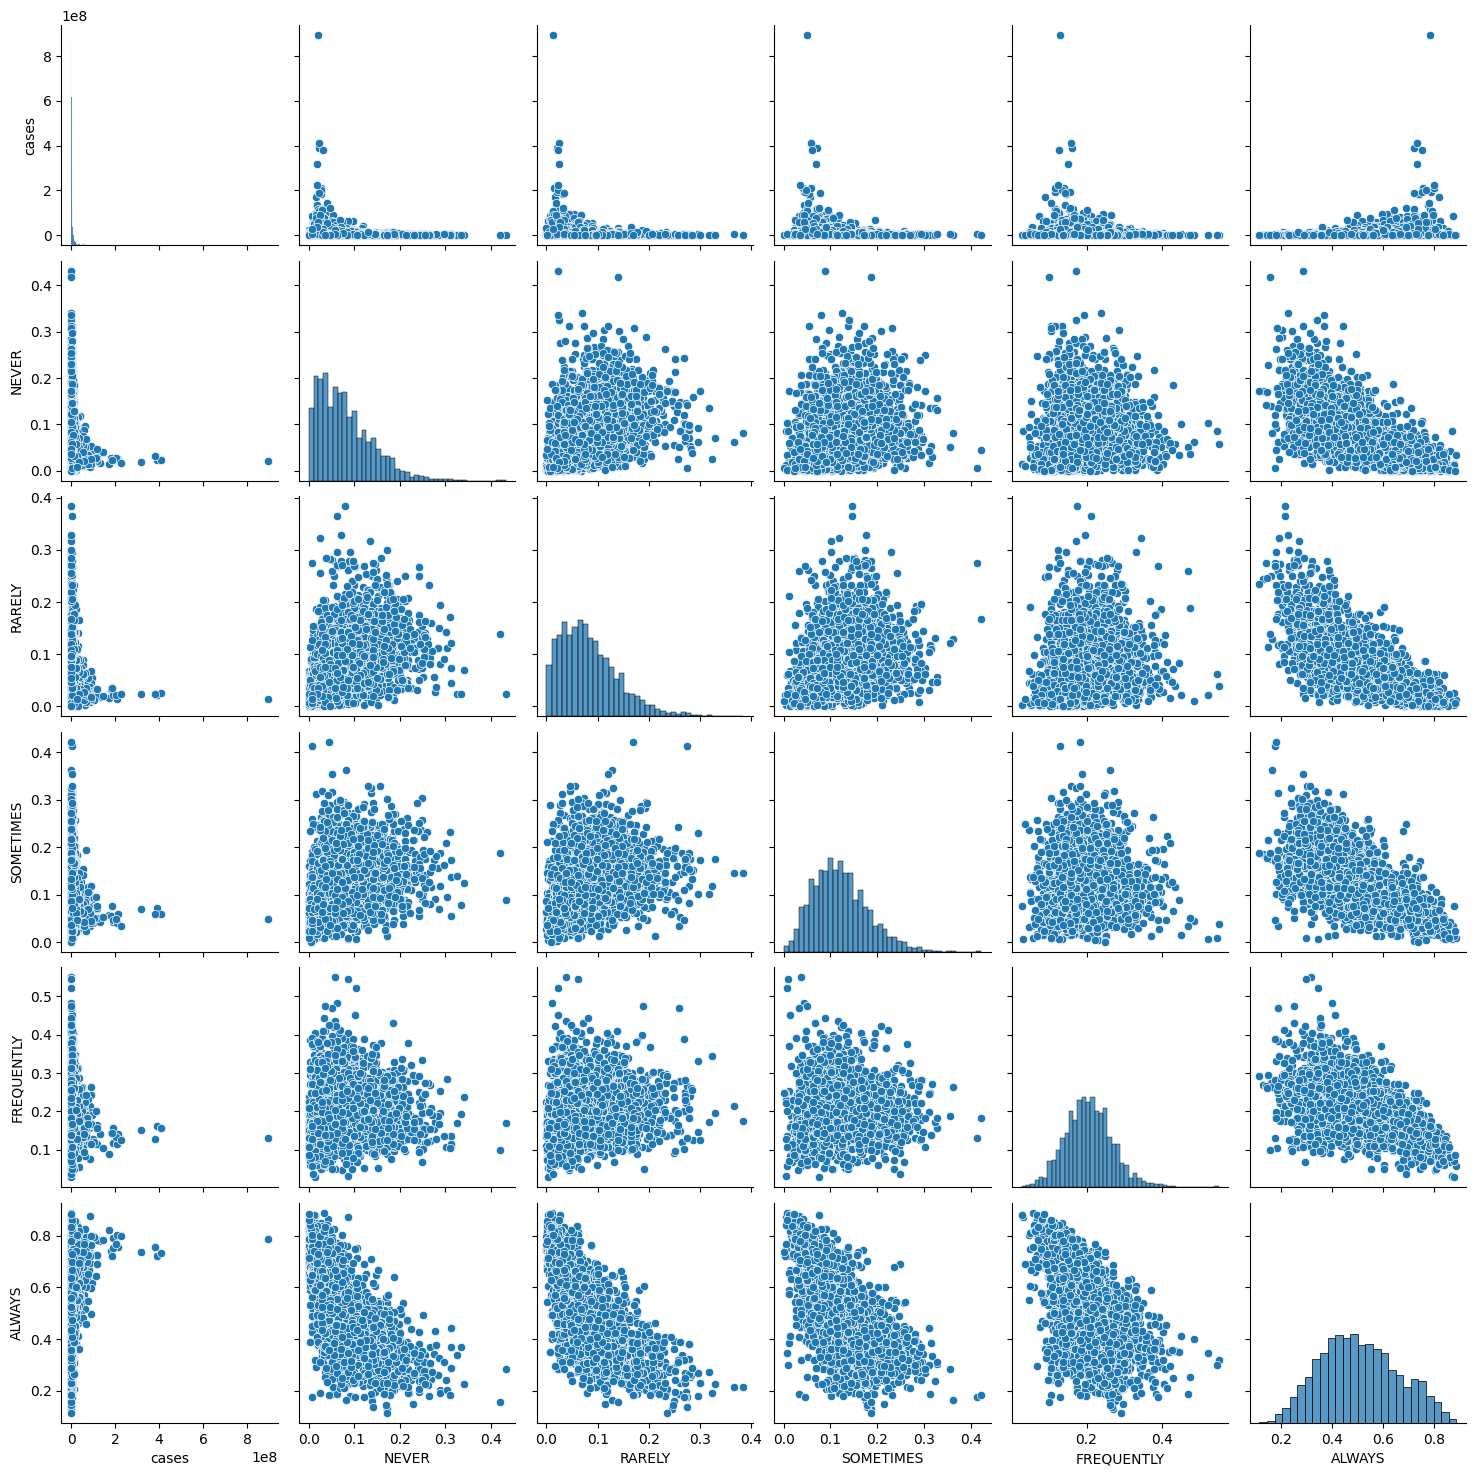

In [ ]:
sns.pairplot(merged_df_2[['cases', 'NEVER', 'RARELY', 'SOMETIMES', 'FREQUENTLY', 'ALWAYS']])
plt.show()

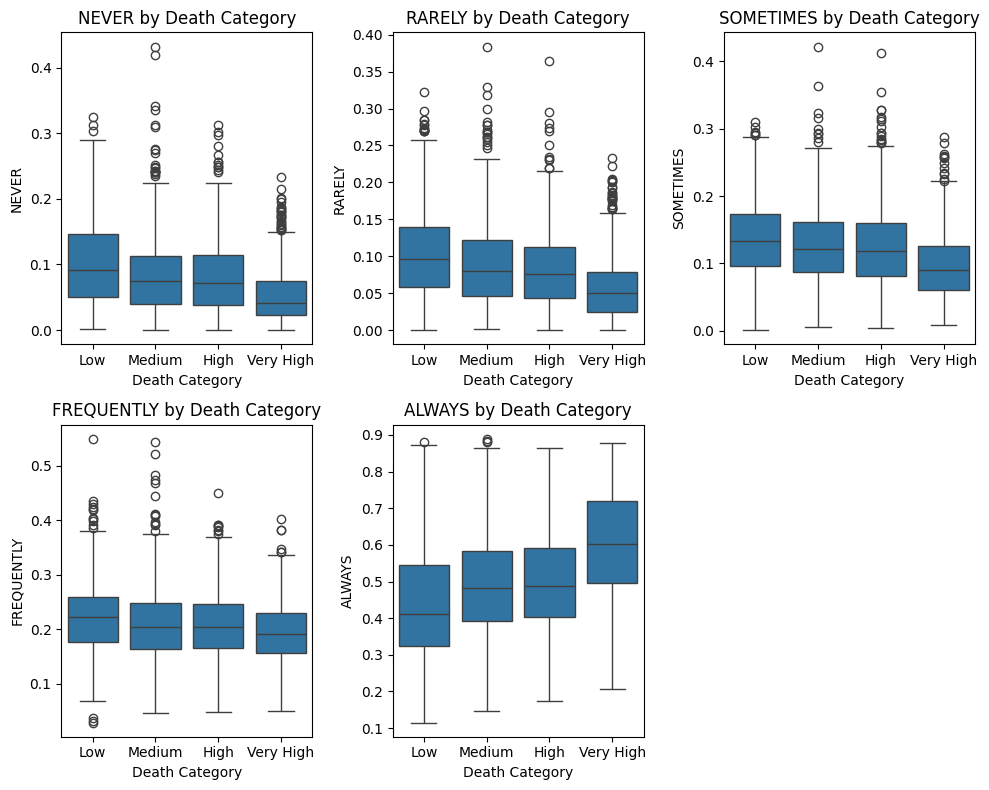

In [ ]:
# Create categories for deaths
merged_df_2['case_category'] = pd.qcut(merged_df_2['cases'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Plot boxplots for mask-wearing scores
plt.figure(figsize=(10, 8))
for i, col in enumerate(mask_columns, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='case_category', y=col, data=merged_df_2)
    plt.title(f"{col} by Death Category")
    plt.xlabel("Death Category")
    plt.ylabel(f"{col}")

plt.tight_layout()
plt.show()

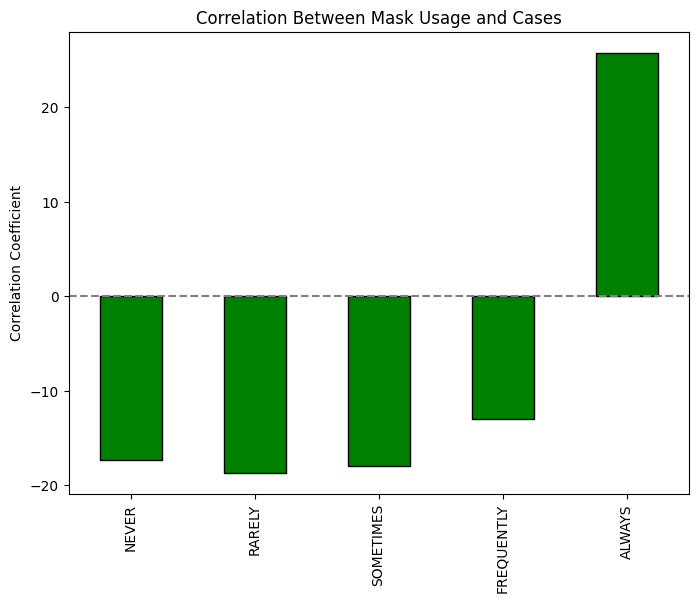

In [ ]:
correlations_with_cases = correlations.loc['cases', mask_columns]*100

plt.figure(figsize=(8, 6))
correlations_with_cases.plot(kind='bar', color='green', edgecolor='black')
plt.title("Correlation Between Mask Usage and Cases")
plt.ylabel("Correlation Coefficient")
plt.axhline(0, color='gray', linestyle='--')
plt.show()

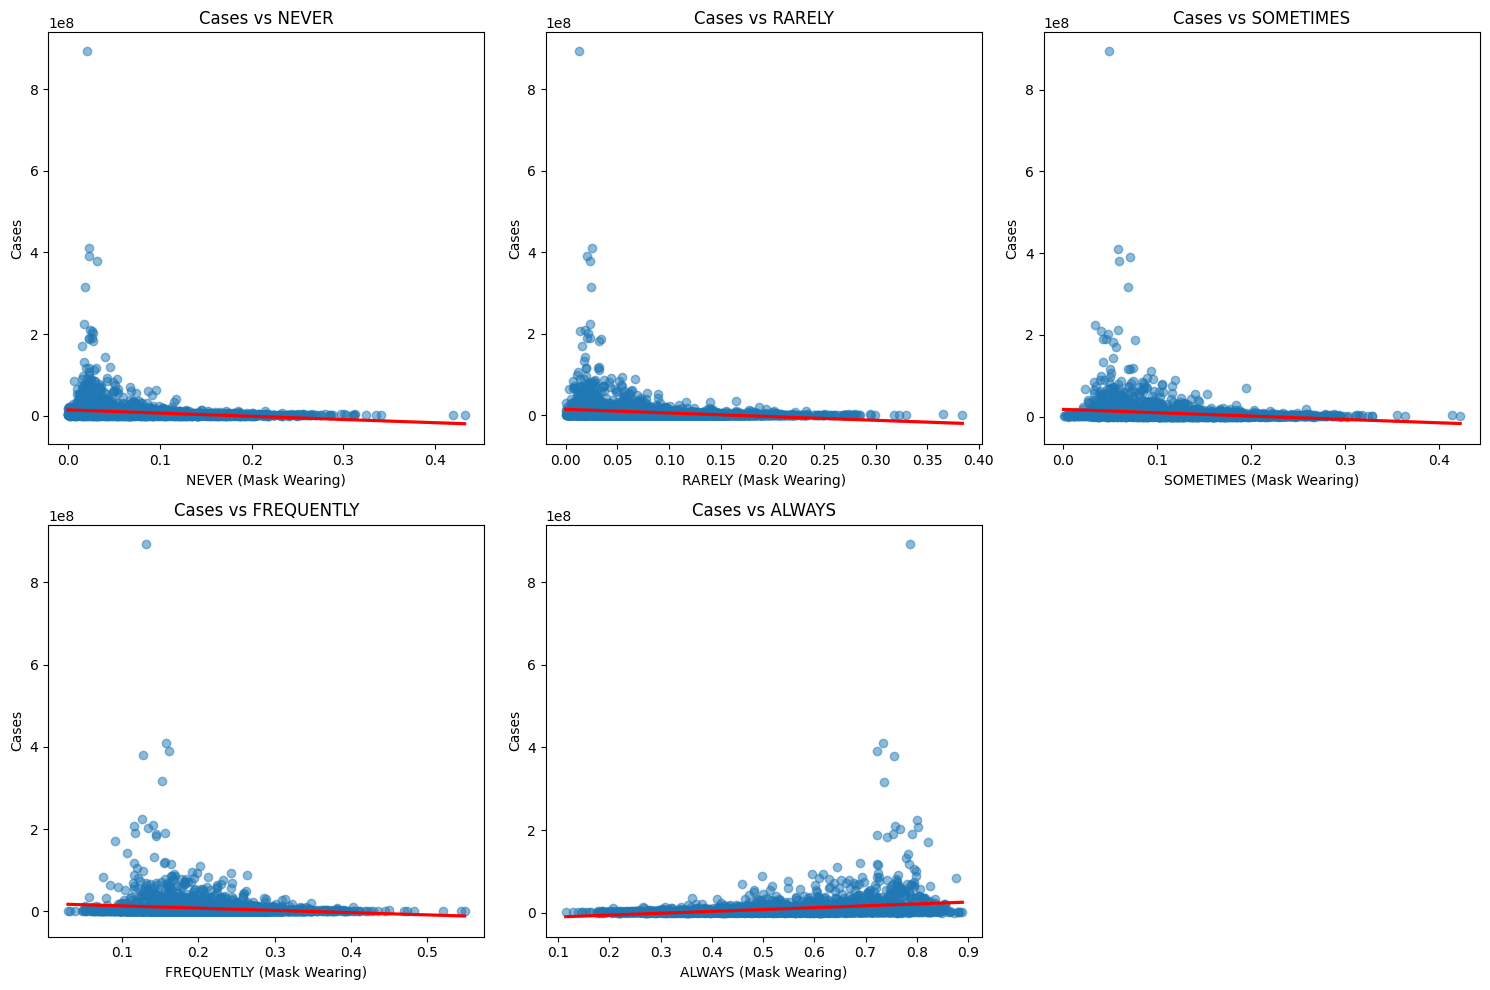

In [ ]:
mask_columns = ['NEVER', 'RARELY', 'SOMETIMES', 'FREQUENTLY', 'ALWAYS']

plt.figure(figsize=(15, 10))
for i, col in enumerate(mask_columns, start=1):
    plt.subplot(2, 3, i)
    sns.regplot(x=merged_df_2[col], y=merged_df_2['cases'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f"Cases vs {col}")
    plt.xlabel(f"{col} (Mask Wearing)")
    plt.ylabel("Cases")

plt.tight_layout()
plt.show()

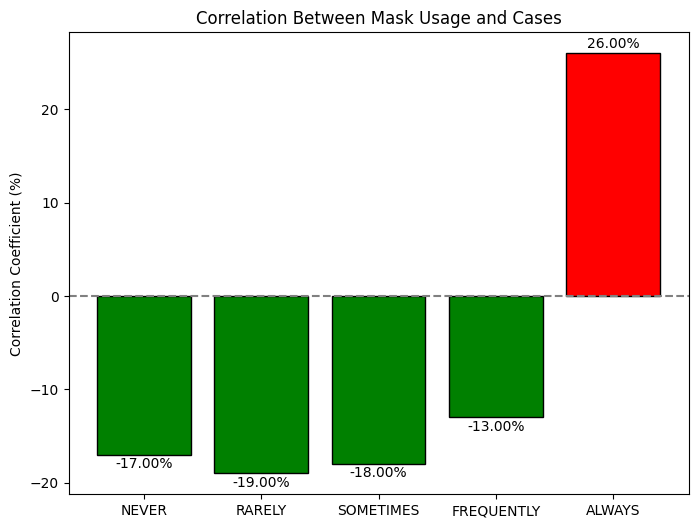

In [ ]:
import matplotlib.pyplot as plt

# Example correlation data (replace with your computed values)
correlation_with_cases = {
    'NEVER': -17,
    'RARELY': -19,
    'SOMETIMES': -18,
    'FREQUENTLY': -13,
    'ALWAYS': 26
}

# Extract labels and values
labels = list(correlation_with_cases.keys())
values = list(correlation_with_cases.values())

# Set colors: Red for 'ALWAYS', Green for others
colors = ['red' if label == 'ALWAYS' else 'green' for label in labels]

# Plot the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=colors, edgecolor='black')

# Add value labels on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + (1 if value > 0 else -1),
             f"{value:.2f}%", ha='center', va='center', fontsize=10)

# Add title and labels
plt.title("Correlation Between Mask Usage and Cases")
plt.ylabel("Correlation Coefficient (%)")
plt.axhline(0, color='gray', linestyle='--')  # Add a zero reference line

plt.show()

This bar chart shows the correlation between mask usage frequency and COVID-19 cases. Negative correlations for "NEVER", "RARELY", "SOMETIMES", and "FREQUENTLY" indicate fewer cases in regions with lower mask adherence. However, "ALWAYS" wearing masks correlates positively (+26%), likely reflecting regions with higher case rates that adopt stricter mask mandates as a response.

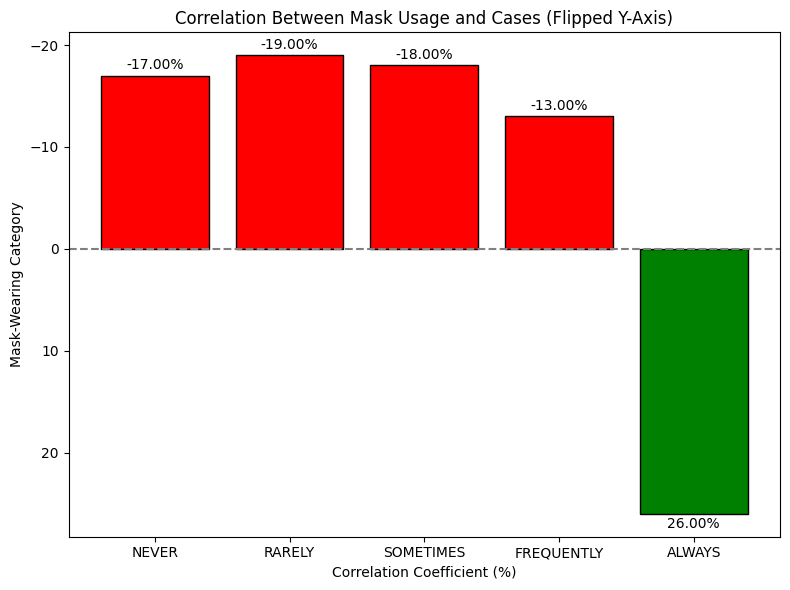

In [ ]:

import matplotlib.pyplot as plt

# Example correlation data
correlation_with_cases = {
    'NEVER': -17.0,
    'RARELY': -19.0,
    'SOMETIMES': -18.0,
    'FREQUENTLY': -13.0,
    'ALWAYS': 26.0
}

# Extract labels and values
labels = list(correlation_with_cases.keys())
values = list(correlation_with_cases.values())

# Set colors: Red for 'ALWAYS', Green for others
colors = ['green' if label == 'ALWAYS' else 'red' for label in labels]

# Plot the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=colors, edgecolor='black')

# Invert the y-axis
plt.gca().invert_yaxis()

# Add value labels on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + (1 if value > 0 else -1),
             f"{value:.2f}%", ha='center', va='center', fontsize=10)

# Add title and labels
plt.title("Correlation Between Mask Usage and Cases (Flipped Y-Axis)")
plt.ylabel("Mask-Wearing Category")
plt.xlabel("Correlation Coefficient (%)")
plt.axhline(0, color='gray', linestyle='--')  # Zero reference line

plt.tight_layout()
plt.show()